# FIT5196 Assessment 3: Data Integration

### Student Name: Neha Jain
### Student ID: 29325013

Date: 26/10/2018

As a part of Task 1, we were required to write Python code to integrate several datasets into one single schema and find and fix possible problems in the data.

Each of you is given 7 datasets in various formats and the data is about housing information in
Victoria, Australia.

As a part of Task 2, we need to study the effectsof different transformation techniques and find the most appropriate  technique.

# 1. Importing the libraries

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import kurtosis, skew
import numpy as np
from math import log, exp

# Task 1

# 2. Reading all the input files and merging them based on the Ids given

In this part, all the input files are read and stored in a Dataframe.

## 2.1 Reading Supermarket Input File

In [2]:
df_supermarket = pd.read_excel('supermarkets.xlsx')
df_supermarket.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


## 2.2 Reading Shoppingcenter Input file

In [3]:
df_shoppingcenter = pd.read_html('shopingcenters.html')
df_shoppingcenter = df_shoppingcenter[0]
df_shoppingcenter.drop("Unnamed: 0", inplace = True, axis=1)
df_shoppingcenter.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451


## 2.3  Reading Hospital Input File

In [4]:
df_hospital = pd.read_json('hospitals.json')
df_hospital.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


## 2.4  Reading Realstate Input File1(JSON)

In [5]:
df_realstate_json = pd.read_json('real_state.json')
df_realstate_json.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,132A Kensington Road,2.0,4.0,-37.797652,144.921043,2.0,6160000.0,10054.0,house,2012.0
1,21 Booth Court,3.0,4.0,-37.704966,145.175110,2.0,9856000.0,46854.0,house,2015.0
2,6 Helene Street,2.0,3.0,-37.707589,145.154072,2.0,9630000.0,47367.0,house,2010.0
3,194 Warrigal Road,1.0,3.0,-37.975074,145.072962,1.0,4455000.0,92072.0,house,2014.0
4,45 Arundel Avenue,1.0,3.0,-37.696764,145.017028,3.0,5300000.0,34986.0,house,2015.0


## 2.5 Reading Realstate Input File2(XML)

In [6]:
import xml.etree.ElementTree as ET

tree = ET.parse('real_state.xml')
root = tree.getroot()

all_records = []
for i, child in enumerate(root):
    record = {}
    for subchild in child:
        record[subchild.tag] = subchild.text
    all_records.append(record)
df_realstate_xml = pd.DataFrame(all_records)


In [7]:
df_realstate_xml = df_realstate_xml.T
df_realstate_xml.head()
df_realstate_xml = df_realstate_xml.reset_index()
df_realstate_xml.head()
df_realstate_xml = df_realstate_xml.drop('index', axis = 1)

In [8]:
df_realstate_xml.columns = ['bathrooms', 'price', 'bedrooms', 'parking_space', 'year', 'lat', 'lng', 'property_type', 'addr_street', 'property_id']
df_realstate_xml.head()

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,1.0,7515000.0,4.0,2.0,2015.0,-37.788514,144.925409,house,13 Serong Street,10045.0
1,2.0,6160000.0,4.0,2.0,2012.0,-37.797652,144.921043,house,132A Kensington Road,10054.0
2,1.0,7440000.0,2.0,0.0,2009.0,-37.78158188,144.9262238,house,16 Canterbury Street,10128.0
3,1.0,11390000.0,3.0,1.0,2012.0,-37.795993,144.931847,house,163 Eastwood Street,10145.0
4,1.0,5577000.0,2.0,0.0,2011.0,-37.785991,144.929929,house,18 Finsbury Street,10168.0


In [9]:
df_realstate_xml = df_realstate_xml[['addr_street', 'bathrooms', 'bedrooms', 'lat','lng', 'parking_space', 'price','property_id',
                                     'property_type','year']]
df_realstate_xml.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,13 Serong Street,1.0,4.0,-37.788514,144.925409,2.0,7515000.0,10045.0,house,2015.0
1,132A Kensington Road,2.0,4.0,-37.797652,144.921043,2.0,6160000.0,10054.0,house,2012.0
2,16 Canterbury Street,1.0,2.0,-37.78158188,144.9262238,0.0,7440000.0,10128.0,house,2009.0
3,163 Eastwood Street,1.0,3.0,-37.795993,144.931847,1.0,11390000.0,10145.0,house,2012.0
4,18 Finsbury Street,1.0,2.0,-37.785991,144.929929,0.0,5577000.0,10168.0,house,2011.0


## 2.6 Merging both Realstate Input Files

### Comparing the two realstate files for matching records based on property_id

In [10]:
df_realstate_xml = df_realstate_xml.sort_values('property_id')
df_realstate_json = df_realstate_json.sort_values('property_id')


l1 = df_realstate_json['property_id'].tolist() 
l2 = df_realstate_xml['property_id'].tolist()

count = 0
for each in l2:
    if float(each) in l1:
        count +=1
print('Comparison between xml to json', count)

count = 0
for each in l1:
    if str(each) in l2:
        count +=1
print('Comparison between json to xml', count)

Comparison between xml to json 26
Comparison between json to xml 31


In [11]:
df_realstate = df_realstate_xml.append(df_realstate_json)

### Removing the nan values from the realstate file and dropping the duplicates

In [12]:
df_realstate = df_realstate[(pd.isna(df_realstate.property_id)==False) & (df_realstate.property_id != 'nan')]

In [13]:
df_realstate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,13 Serong Street,1.0,4.0,-37.788514,144.925409,2.0,7515000.0,10045.0,house,2015.0
1,132A Kensington Road,2.0,4.0,-37.797652,144.921043,2.0,6160000.0,10054.0,house,2012.0
2,16 Canterbury Street,1.0,2.0,-37.78158188,144.9262238,0.0,7440000.0,10128.0,house,2009.0
3,163 Eastwood Street,1.0,3.0,-37.795993,144.931847,1.0,11390000.0,10145.0,house,2012.0
4,18 Finsbury Street,1.0,2.0,-37.785991,144.929929,0.0,5577000.0,10168.0,house,2011.0


Converting the numeric fields to numeric in merged file

In [14]:
df_realstate[[ 'bathrooms', 'bedrooms', 'lat','lng', 'parking_space', 'price','property_id','year']] = df_realstate[[ 'bathrooms', 'bedrooms', 'lat','lng', 'parking_space', 'price','property_id','year']].apply(pd.to_numeric)

In [15]:
df_realstate.drop_duplicates( subset = 'property_id', keep='first', inplace=True)

In [16]:
df_realstate.reset_index(drop = True,inplace=True)
df_realstate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,13 Serong Street,1.0,4.0,-37.788514,144.925409,2.0,7515000.0,10045.0,house,2015.0
1,132A Kensington Road,2.0,4.0,-37.797652,144.921043,2.0,6160000.0,10054.0,house,2012.0
2,16 Canterbury Street,1.0,2.0,-37.781582,144.926224,0.0,7440000.0,10128.0,house,2009.0
3,163 Eastwood Street,1.0,3.0,-37.795993,144.931847,1.0,11390000.0,10145.0,house,2012.0
4,18 Finsbury Street,1.0,2.0,-37.785991,144.929929,0.0,5577000.0,10168.0,house,2011.0


In [17]:
df_realstate.shape

(1974, 10)

## 2.7 Reading the GTFS Melbourne Train Information 

##### In the below section, all the GTFS Melbourne Train Information is read into different Dataframes and merged into a single Dataframe

Reading all the files

In [18]:
df_train_stop = pd.read_csv('stops.txt')
df_train_stop.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [19]:
df_calender = pd.read_csv('calendar.txt')
df_calender.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


### Filtering out the services that run on the Weekdays i.e. 'T0'.

In [20]:
df_calender = df_calender[df_calender.service_id == 'T0']
df_calender

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
8,T0,1,1,1,1,1,0,0,20151023,20151122


In [21]:
df_trips = pd.read_csv('trips.txt')
df_trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [22]:
df_stop_times = pd.read_csv('stop_times.txt')
df_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [23]:
df_routes = pd.read_csv('routes.txt')
df_routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


Merging all the files

In [24]:
df_train = df_calender.merge(df_trips, on = ['service_id'], how = 'inner')


In [25]:
df_train = df_train.merge(df_stop_times, on = ['trip_id'], how = 'inner')


In [26]:
df_train = df_train.merge(df_train_stop, on = ['stop_id'], how = 'inner')


In [27]:
df_train = df_train.merge(df_routes, on = ['route_id'], how = 'inner')

In [28]:
df_train.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,...,drop_off_type,shape_dist_traveled,stop_name,stop_short_name,stop_lat,stop_lon,agency_id,route_short_name,route_long_name,route_type
0,T0,1,1,1,1,1,0,0,20151023,20151122,...,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656,1,Alamein,Alamein - City (Flinders Street),2
1,T0,1,1,1,1,1,0,0,20151023,20151122,...,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656,1,Alamein,Alamein - City (Flinders Street),2
2,T0,1,1,1,1,1,0,0,20151023,20151122,...,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656,1,Alamein,Alamein - City (Flinders Street),2
3,T0,1,1,1,1,1,0,0,20151023,20151122,...,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656,1,Alamein,Alamein - City (Flinders Street),2
4,T0,1,1,1,1,1,0,0,20151023,20151122,...,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656,1,Alamein,Alamein - City (Flinders Street),2


# 3. Calculating the nearest Shopping Center and its distance to each property

Now we calculate the nearest shopping center to each property and its distance to it.

In [29]:
df_final = df_realstate[['addr_street', 'bathrooms', 'bedrooms', 'lat','lng', 'parking_space', 'price','property_id',
                                     'property_type','year']]
df_final.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,13 Serong Street,1.0,4.0,-37.788514,144.925409,2.0,7515000.0,10045.0,house,2015.0
1,132A Kensington Road,2.0,4.0,-37.797652,144.921043,2.0,6160000.0,10054.0,house,2012.0
2,16 Canterbury Street,1.0,2.0,-37.781582,144.926224,0.0,7440000.0,10128.0,house,2009.0
3,163 Eastwood Street,1.0,3.0,-37.795993,144.931847,1.0,11390000.0,10145.0,house,2012.0
4,18 Finsbury Street,1.0,2.0,-37.785991,144.929929,0.0,5577000.0,10168.0,house,2011.0


In [30]:
df_final = df_final[['property_id', 'lat','lng', 'addr_street',  'price','property_type','year',
                      'bedrooms', 'bathrooms','parking_space']]

In [31]:
from math import sin, cos, sqrt, atan2, radians

R = 6373.0

for x in df_final.index:
    list_dist = []
    list_sc = []
    min_sc = ''
    min_dist = 0
    for y in df_shoppingcenter.index:

        lat1 = radians(float(df_shoppingcenter.iloc[y]['lat']))
        lon1 = radians(float(df_shoppingcenter.iloc[y]['lng']))
        lat2 = radians(float(df_final.iloc[x]['lat']))
        lon2 = radians(float(df_final.iloc[x]['lng']))

        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        distance = R * c *1000
        
        list_dist.append(distance)
        list_sc.append(df_shoppingcenter.iloc[y]['sc_id'])
  
    min_dist = min(list_dist)
    min_sc = list_sc[list_dist.index(min(list_dist))]
    
    df_final.at[x, 'shopping_center_id'] = min_sc
    df_final.at[x, 'distance_to_sc'] = round(min_dist,2)



In [32]:
df_final.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,shopping_center_id,distance_to_sc
0,10045.0,-37.788514,144.925409,13 Serong Street,7515000.0,house,2015.0,4.0,1.0,2.0,SC_011,1062.60
1,10054.0,-37.797652,144.921043,132A Kensington Road,6160000.0,house,2012.0,4.0,2.0,2.0,SC_011,1752.39
2,10128.0,-37.781582,144.926224,16 Canterbury Street,7440000.0,house,2009.0,2.0,1.0,0.0,SC_011,890.83
3,10145.0,-37.795993,144.931847,163 Eastwood Street,11390000.0,house,2012.0,3.0,1.0,1.0,SC_011,2049.00
4,10168.0,-37.785991,144.929929,18 Finsbury Street,5577000.0,house,2011.0,2.0,1.0,0.0,SC_011,1276.85


# 4. Calculating the nearest Hospital and its distance to each property

Now we calculate the nearest hospital to each property and its distance to it.

In [33]:
from math import sin, cos, sqrt, atan2,radians

R = 6373.0

for x in df_final.index:
    min_hosp = ''
    min_dist = 0
    list_dist = []
    list_hosp = []
    for y in df_hospital.index:

        lat1 = radians(float(df_hospital.iloc[y]['lat']))
        lon1 = radians(float(df_hospital.iloc[y]['lng']))
        lat2 = radians(float(df_final.iloc[x]['lat']))
        lon2 = radians(float(df_final.iloc[x]['lng']))

        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        distance = R * c *1000
        
        list_dist.append(distance)
        list_hosp.append(df_hospital.iloc[y]['id'])

    min_dist = min(list_dist)
    min_hosp = list_hosp[list_dist.index(min(list_dist))]
    
    df_final.at[x, 'hospital_id'] = min_hosp
    df_final.at[x, 'distance_to_hospital'] = round(min_dist,2)



In [34]:
df_final.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital
0,10045.0,-37.788514,144.925409,13 Serong Street,7515000.0,house,2015.0,4.0,1.0,2.0,SC_011,1062.60,hospital_114,804.94
1,10054.0,-37.797652,144.921043,132A Kensington Road,6160000.0,house,2012.0,4.0,2.0,2.0,SC_011,1752.39,hospital_114,884.34
2,10128.0,-37.781582,144.926224,16 Canterbury Street,7440000.0,house,2009.0,2.0,1.0,0.0,SC_011,890.83,hospital_007,804.32
3,10145.0,-37.795993,144.931847,163 Eastwood Street,11390000.0,house,2012.0,3.0,1.0,1.0,SC_011,2049.00,hospital_114,202.83
4,10168.0,-37.785991,144.929929,18 Finsbury Street,5577000.0,house,2011.0,2.0,1.0,0.0,SC_011,1276.85,hospital_114,959.59


# 5. Calculating the nearest Supermarket and its distance to each property

Now we calculate the nearest Supermarket to each property and its distance to it.

In [35]:
for x in df_final.index:
    min_sp = ''
    min_dist = 0
    list_dist = []
    list_sp = []
    for y in df_supermarket.index:

        lat1 = radians(float(df_supermarket.iloc[y]['lat']))
        lon1 = radians(float(df_supermarket.iloc[y]['lng']))
        lat2 = radians(float(df_final.iloc[x]['lat']))
        lon2 = radians(float(df_final.iloc[x]['lng']))

        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c *1000
       
        list_dist.append(distance)
        list_sp.append(df_supermarket.iloc[y]['id'])

    min_dist = min(list_dist)
    min_sp = list_sp[list_dist.index(min(list_dist))]
    df_final.at[x, 'supermarket_id'] = min_sp
    df_final.at[x, 'distance_to_supermaket'] = round(min_dist,2)



In [36]:
df_final.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,shopping_center_id,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,10045.0,-37.788514,144.925409,13 Serong Street,7515000.0,house,2015.0,4.0,1.0,2.0,SC_011,1062.60,hospital_114,804.94,S_086,263.18
1,10054.0,-37.797652,144.921043,132A Kensington Road,6160000.0,house,2012.0,4.0,2.0,2.0,SC_011,1752.39,hospital_114,884.34,S_086,1310.89
2,10128.0,-37.781582,144.926224,16 Canterbury Street,7440000.0,house,2009.0,2.0,1.0,0.0,SC_011,890.83,hospital_007,804.32,S_086,639.26
3,10145.0,-37.795993,144.931847,163 Eastwood Street,11390000.0,house,2012.0,3.0,1.0,1.0,SC_011,2049.00,hospital_114,202.83,S_086,1040.65
4,10168.0,-37.785991,144.929929,18 Finsbury Street,5577000.0,house,2011.0,2.0,1.0,0.0,SC_011,1276.85,hospital_114,959.59,S_086,223.32


# 6. Calculating the Suburb for each property

Now we calculate the suburb for each property using the Victoria Suburb file given.

In [37]:
#!pip install Shapely-1.6.4.post1-cp36-cp36m-win_amd64.whl

In [38]:
import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [39]:
sf = shapefile.Reader("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp")
recs = sf.records()
shapes = sf.shapes()
recs

[['6670',
  datetime.date(2011, 8, 31),
  None,
  'VIC2615',
  datetime.date(2012, 4, 27),
  None,
  'UNDERBOOL',
  '',
  '',
  'G',
  None,
  '2'],
 ['6671',
  datetime.date(2011, 8, 31),
  None,
  'VIC1986',
  datetime.date(2012, 4, 27),
  None,
  'NURRAN',
  '',
  '',
  'G',
  None,
  '2'],
 ['6672',
  datetime.date(2011, 8, 31),
  None,
  'VIC2862',
  datetime.date(2012, 4, 27),
  None,
  'WOORNDOO',
  '',
  '',
  'G',
  None,
  '2'],
 ['6673',
  datetime.date(2011, 8, 31),
  None,
  'VIC734',
  datetime.date(2017, 8, 9),
  None,
  'DEPTFORD',
  '',
  '',
  'G',
  None,
  '2'],
 ['6674',
  datetime.date(2011, 8, 31),
  None,
  'VIC2900',
  datetime.date(2012, 4, 27),
  None,
  'YANAC',
  '',
  '',
  'G',
  None,
  '2'],
 ['6405',
  datetime.date(2011, 8, 31),
  None,
  'VIC1688',
  datetime.date(2012, 4, 27),
  None,
  'MINIMAY',
  '',
  '',
  'G',
  None,
  '2'],
 ['6451',
  datetime.date(2011, 8, 31),
  None,
  'VIC999',
  datetime.date(2012, 4, 27),
  None,
  'GLEN FORBES',
  ''

In [40]:
len(recs), len(shapes)

(2973, 2973)

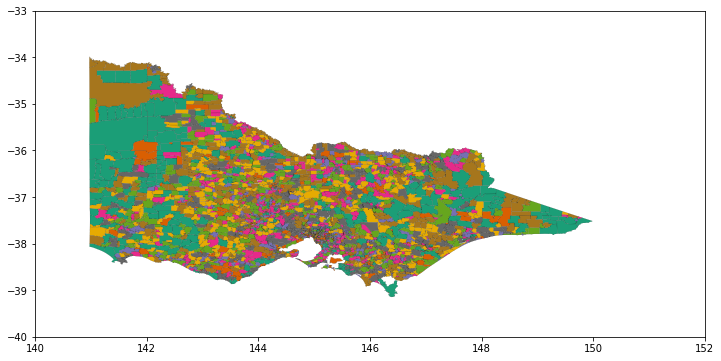

In [41]:
from shapely.geometry import Point
from shapely.geometry import shape


cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*numpy.arange(Nshp)/Nshp)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

for nshp in range(Nshp):
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    for pij in range(len(prt)):
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))

ax.set_xlim(140,+152)
ax.set_ylim(-40,-33)

count = 0
for each in df_final.index:
    count = 0
    i = 0
    point = (float(df_final.iloc[each]['lng']), float(df_final.iloc[each]['lat']))
    
    while count ==0:
        if i < len(shapes):
            boundary = shape(shapes[i])
            if (boundary.contains(Point(point))):
                df_final.at[each, 'suburb'] = recs[i][6]
                count = 1 
        else:
            count=1
        i = i+1  

# 7. Calculating the nearest Train Station, its Direct/Indirect transfer to CBD and its distance to each property

Next we calculate the nearerst train station to each property and its minimum travel time to CBD. The transfers can be direct or indirect and accordingly the transfer flag is set to 0 or 1.

Only the trips which run on Weekdays is taken account. Therefore, service ID = 'T0' is only considered and filtered.

In [42]:
df_trips[(df_trips.trip_id.str.contains("T0"))]["trip_headsign"].unique()

array(['City (Flinders Street)', 'Alamein', 'Craigieburn', 'Belgrave',
       'Cranbourne', 'South Morang', 'Frankston', 'Glen Waverley',
       'Hurstbridge', 'Lilydale', 'Pakenham', 'Sandringham',
       'Stony Point', 'Sunbury', 'Upfield', 'Werribee', 'Williamstown'],
      dtype=object)

#### Calculating the Direct and Indirect transfers and travel time

In [43]:
from datetime import datetime

stop_list=df_train_stop['stop_id'].tolist()
df_transfer = pd.DataFrame(columns = ['stop_id', 'time', 'flag'])
for each in stop_list:
    if each != 19854:
        temp1=df_train[df_train['stop_id'].isin([each]) & (df_train['trip_headsign']=='City (Flinders Street)') & \
                      (df_train['departure_time']>='07:00:00') & (df_train['departure_time']<='09:00:00')]
        temp2=df_train[df_train['stop_id'].isin([19854]) & (df_train['trip_headsign']=='City (Flinders Street)')]

        temp1=temp1[['route_id','trip_id','arrival_time','departure_time','stop_id']]
        temp2=temp2[['route_id','trip_id','arrival_time','departure_time','stop_id']]

        temp3=temp1.merge(temp2,left_on=['route_id','trip_id'],right_on=['route_id','trip_id'],suffixes=('_1','_2'), how = 'inner')

        temp3['diff']=pd.to_datetime(temp3['arrival_time_2'])-pd.to_datetime(temp3['departure_time_1'])
        temp3['diff1']=temp3['diff'].dt.total_seconds()/60

        l = len(df_transfer)
        df_transfer.at[l, 'time'] = round(temp3['diff1'].mean(),2)
        df_transfer.at[l, 'stop_id'] = each
        if pd.isna(df_transfer.iloc[l]['time'])==False:
            df_transfer.at[l, 'flag'] = 0

   
    

Updating the time and flag for Flinders Street Station to 0.

In [44]:
l = len(df_transfer) 
df_transfer.at[l, 'stop_id'] = 19854
df_transfer.at[l, 'flag'] = 0
df_transfer.at[l, 'time'] = 0 

In [45]:
for i in df_transfer[(df_transfer['time'].isna()) & (df_transfer['stop_id']!= 19854)].index:
    time = 0
    count =0 
    stop = df_transfer.loc[i]['stop_id']
    
    for j in df_train[(df_train.stop_id.isin([stop])) & (df_train['departure_time']>='07:00:00') &\
                      (df_train['departure_time']<='09:00:00') & (df_train['direction_id'] == 0)].index:

        route = df_train.loc[j]['route_long_name']
        trip_stop = df_train.loc[j]['trip_id']

        list_stop = df_train[(df_train['route_long_name'] == route) & (df_train['trip_id']==trip_stop)]['stop_id'].tolist()

        list_stop = list(set(list_stop))

        for y in list_stop:

            arrival_stop = df_train.loc[(df_train['stop_id']==y) & \
                                   (df_train['trip_id'] == trip_stop)]['arrival_time'].item()

            df_temp =  df_train.loc[(df_train['stop_id'].isin([y, 19854])) &\
                                   (df_train['trip_headsign'] == 'City (Flinders Street)')].sort_values(by = ['departure_time'])

            counter = 0
  
            for z in df_temp.loc[(df_train['stop_id']==y) & \
                               (df_train['trip_headsign'] == 'City (Flinders Street)')].index:
                trip_id = df_temp.loc[z]['trip_id']

                if df_temp.loc[(df_temp['stop_id']==y) & (df_temp['trip_id'] == trip_id)]['departure_time'].item() > arrival_stop and counter ==0:
                    if df_temp.loc[(df_temp['trip_id']==trip_id) & (df_temp['stop_id'] ==19854)].empty == False:
                        x =  df_temp.index[(df_temp['trip_id']==trip_id) & (df_temp['stop_id'] ==19854)].item()
                        arr_time= df_temp.loc[x]['arrival_time']
                       
                        diff = pd.to_datetime(arr_time)-pd.to_datetime(df_train.loc[j]['departure_time'])
                        diff = diff.total_seconds()/60
                        time+=diff
                        count +=1
                        counter+=1

    if time != 0:
        time = time/count                                    
        df_transfer.at[i, 'time'] =round(time,2)
        df_transfer.at[i, 'flag'] = 1                        
                            

Dropping the Stop Ids where there is no train (direct/indirect) to Flinders and merging them to the stops data

In [46]:
df_transfer = df_transfer[pd.isna(df_transfer.time) == False]
df_train_stop = df_train_stop.merge(df_transfer, on = ['stop_id'], how = 'inner')

### Calculating the nearest train station and its distance to the property

Now calculating the nearest train station to the property and assigning its corresponding trasnfer flag and time to CBD.

In [47]:
from math import sin, cos, sqrt, atan2, radians

R = 6373.0

for x in df_final.index:
    min_stop = ''
    min_dist = 0
    list_dist = []
    list_stop = []
    for y in df_train_stop.index:
        
        lat1 = radians(float(df_train_stop.iloc[y]['stop_lat']))
        lon1 = radians(float(df_train_stop.iloc[y]['stop_lon']))
        lat2 = radians(float(df_final.iloc[x]['lat']))
        lon2 = radians(float(df_final.iloc[x]['lng']))

        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c *1000
         
        list_dist.append(distance)
        list_stop.append(df_train_stop.iloc[y]['stop_id'])

    min_dist = min(list_dist)
    min_stop = list_stop[list_dist.index(min(list_dist))]
    
    df_final.at[x, 'train_station_id'] = min_stop
    df_final.at[x, 'distance_to_train_station'] = round(min_dist,2)
    df_final.at[x, 'transfer_flag'] = df_train_stop.loc[df_train_stop.stop_id == min_stop]['flag'].item()
    df_final.at[x, 'travel_min_to_CBD'] = df_train_stop.loc[df_train_stop.stop_id == min_stop]['time'].item()



# 8. Writing the output file

#### Checking the duplicates before writing the Data to the output file.

In [48]:
df_final[df_final.duplicated(keep=False)]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,distance_to_sc,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket,suburb,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD


Columns of the final output are set as per the required format

In [49]:
df_final = df_final[["property_id", "lat", "lng", "addr_street", "suburb", "price", "property_type", "year","bedrooms", "bathrooms",
                   "parking_space", "shopping_center_id", "distance_to_sc", "train_station_id", "distance_to_train_station","travel_min_to_CBD",
                    "transfer_flag", "hospital_id", "distance_to_hospital", "supermarket_id","distance_to_supermaket" ]]

The data is written to the output file.

In [50]:
df_final.to_csv("29325013_solution.csv")

# Task 2

# 9. Data Reshaping

We need data transformation and reshaping because raw attributes do not result into and accurate model for the prediction.<br>Reshaping of data involves multiple steps to generate new attributes from original attributes to as to increase the power of predictive model. This also helps in improving visualization of the attributes.


Other reasons for reshaping of data apart from improving the predictive model and visualization are:
* Fix skewness
* Better interpretation of data

Different methods for Reshaping are:
* Log transformation
* Power Transformation
* Standardization
* Normalisation

The attribute must be normally distributed and skewness = 0.03 and kurtosis ~ 3. This criteria is taken into account while judging which transformation is best for the given set of data.

### 9.1 Original Attribute Price

We first observe histogram for the original attribute to see if it is normally distrubuted or not and find its skewness and kurtosis . We will also try to fit the data to the Linear model.


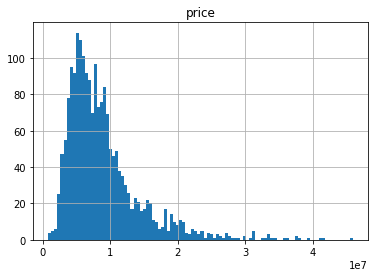

6.071824433202254
2.0437741017588844


In [51]:
df_final.hist(column= "price", bins = 100)
plt.show()
print(kurtosis(df_final["price"]))
print(skew(df_final["price"]))

As observed above, the price attribute is not normally distributed and is right skewed.<br><br>We also try to fit the model to the Linear Model.

In [52]:
import statsmodels.formula.api as smf
model_f = 'price ~ bedrooms + \
                 bathrooms + \
                 parking_space + property_type'
model = smf.ols(formula=model_f, data=df_final)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     46.25
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           6.97e-29
Time:                        22:14:20   Log-Likelihood:                -33396.
No. Observations:                1974   AIC:                         6.680e+04
Df Residuals:                    1970   BIC:                         6.682e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.776e+06   5.24e+05      7.205      0.000    2.75e+06     4.8e+06
bedrooms       7.665e+05   1.97e+05      3.883      0.000    3.79e+05    1.15e+06
bathrooms      1.427e+06   2.41e+05      5.922      0.000    9.54e+05     1.9e+06
parking_space  3.342e+05   1.64e+05      2.032      0.042    1.17e+04    6.57e+05
==============================================================================
Omnibus:                      810.282   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3947.105
Skew:                           1.917   Prob(JB):                         0.00
Kurtosis:                       8.769   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 R-sqaure value is 0.066 and also the kurtosis and skewness value is very high. We can further prove it from the residual fit plot below.<br><br>The below code reference has been taken from https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

Text(0, 0.5, 'Standardized Residuals')

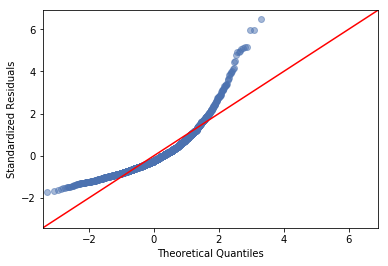

In [53]:
fit_y = model_fit.fittedvalues
res = model_fit.resid
norm_res = model_fit.get_influence().resid_studentized_internal
norm_resid_abssqrt = np.sqrt(np.abs(norm_res))
abs_resid = np.abs(res)

from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(norm_res)
plt_lm = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt_lm.axes[0].set_xlabel('Theoretical Quantiles')
plt_lm.axes[0].set_ylabel('Standardized Residuals')

Therefore, from the above graph and the statistics, it can be said that this model is not a good model for prediction.<br>Thus we will try some transformation techniques to acheive a better model.

### 9.2 Standardization of Price Attribute 

Standardization means calcualting the Z-score.We will use a package "preprocessing" and StandardScaler class for standardizing the price attribute. Z-scrore calculation is based on the below formula:<br>&emsp;&emsp;value_z = (value-mean)/stadard_deviation<br>
This is done directly using the mentioned class.


We first standardise the price attribute and store it to a different attribute price_standard and use that attribute for observing the statistics to prove if it is a better model or not.

Below we have also plotted histogram for the standardized price attribute to see if it is normally distrubuted or not.

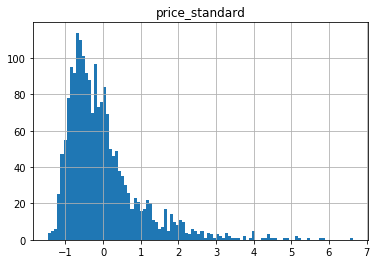

6.071824433202254
2.0437741017588844


In [54]:
std_scale= preprocessing.StandardScaler().fit(df_final[['price']])
df_final["price_standard"] = std_scale.transform(df_final[['price']])
df_final.hist(column= "price_standard", bins = 100)
plt.show()
print(kurtosis(df_final["price_standard"]))
print(skew(df_final["price_standard"]))

As observed above, the graph is not normally distributed and is right skewed similar to the original attribute.<br><br> Now we also try to fit it to the linear model to see it the prediction is better than original or not.

In [55]:
import statsmodels.formula.api as smf
model_f = 'price_standard ~ bedrooms + \
                 bathrooms + \
                 parking_space + property_type'
model = smf.ols(formula=model_f, data=df_final)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_standard   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     46.25
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           6.97e-29
Time:                        22:14:20   Log-Likelihood:                -2733.8
No. Observations:                1974   AIC:                             5476.
Df Residuals:                    1970   BIC:                             5498.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9290      0.094     -9.875      0.000      -1.113      -0.744
bedrooms          0.1376      0.035      3.883      0.000       0.068       0.207
bathrooms         0.2561      0.043      5.922      0.000       0.171       0.341
parking_space     0.0600      0.030      2.032      0.042       0.002       0.118
==============================================================================
Omnibus:                      810.282   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3947.105
Skew:                           1.917   Prob(JB):                         0.00
Kurtosis:                       8.769   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-sqaure value is 0.066 and also the kurtosis and skewness value is very high.<br>
Further the r-square, skewness and kurtosis is same to the original model and hence it can not be said that standard transformation is better than the original one.<br><br>


### 9.3 Normalization of the price

Normalization means rescaling the attribute in a specific range(genarlly between 0 and 1).We will use a package "preprocessing" and MinMaxScaler class for normalizing the price attribute. Calculation is based on the below formula:<br>&emsp;&emsp;value_z = (value-min)/(max-min)<br>
This is done directly using the mentioned class.

We first normalize the price attribute and store it to a different attribute price_normal and use that attribute for observing the statistics to prove if it is a better model or not.


Below we have also plotted histogram for the normalized price attribute to see if it is normally distrubuted or not.

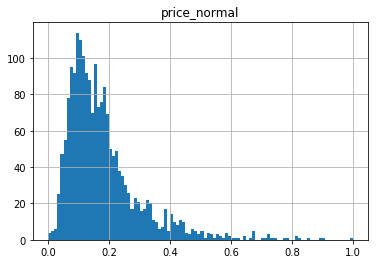

6.071824433202256
2.0437741017588853


In [56]:
std_scale= preprocessing.MinMaxScaler().fit(df_final[['price']])
df_final["price_normal"] = std_scale.transform(df_final[['price']])
df_final.hist(column= "price_normal", bins = 100)
plt.show()
print(kurtosis(df_final["price_normal"]))
print(skew(df_final["price_normal"]))

As observed above, the graph is not normally distributed and is right skewed similar to the original attribute.
<br><br>
Now we also try to fit it to the linear model to see it the prediction is better than original or not.

In [57]:
import statsmodels.formula.api as smf
model_f = 'price_normal ~ bedrooms + \
                 bathrooms + \
                 parking_space + property_type'
model = smf.ols(formula=model_f, data=df_final)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_normal   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     46.25
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           6.97e-29
Time:                        22:14:21   Log-Likelihood:                 1392.1
No. Observations:                1974   AIC:                            -2776.
Df Residuals:                    1970   BIC:                            -2754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0650      0.012      5.587      0.000       0.042       0.088
bedrooms          0.0170      0.004      3.883      0.000       0.008       0.026
bathrooms         0.0317      0.005      5.922      0.000       0.021       0.042
parking_space     0.0074      0.004      2.032      0.042       0.000       0.015
==============================================================================
Omnibus:                      810.282   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3947.105
Skew:                           1.917   Prob(JB):                         0.00
Kurtosis:                       8.769   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-sqaure value is 0.066 and also the kurtosis and skewness value is very high.
Further the skewness and kurtosis is same to the original model and hence it can not be said that standard transformation is better than the original one.

Thereby till now, out of the three compared transformations, original model still holds true as there is no change on the model after transformation.

### 9.4 Log transformation of the price

Log transformation means rescaling the attribute to its log value.We will use log function to rescale the price attribute. <br><br>

We first take the log of the price attribute and store it to a different attribute price_log and use that attribute for observing the statistics to prove if it is a better model or not.
<br><br>
Below we have also plotted histogram for the log price attribute to see if it is normally distrubuted or not.

0.18185308956098334
0.14048010069328445


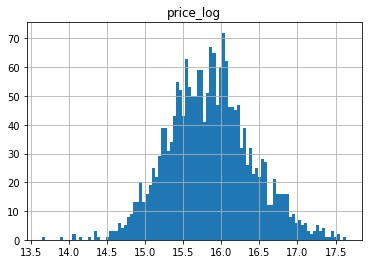

In [58]:
df_final["price_log"] = [log(float(x)) for x in df_final['price']]
df_final.hist(column= "price_log", bins = 100)
print(kurtosis(df_final["price_log"]))
print(skew(df_final["price_log"]))

As observed above, the graph is close to normally distributed and looks better than the one for the original attribute. 
<br><br>
Now we try to fit it to the linear model to see it the prediction is better than original or not.

In [59]:
import statsmodels.formula.api as smf
model_f = 'price_log ~ bedrooms + \
                 bathrooms + \
                 parking_space + property_type'
model = smf.ols(formula=model_f, data=df_final)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     43.13
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           5.45e-27
Time:                        22:14:21   Log-Likelihood:                -1566.9
No. Observations:                1974   AIC:                             3142.
Df Residuals:                    1970   BIC:                             3164.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.3498      0.052    294.681      0.000      15.248      15.452
bedrooms          0.0761      0.020      3.877      0.000       0.038       0.115
bathrooms         0.1334      0.024      5.570      0.000       0.086       0.180
parking_space     0.0331      0.016      2.024      0.043       0.001       0.065
==============================================================================
Omnibus:                        3.232   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.203
Skew:                           0.070   Prob(JB):                        0.202
Kurtosis:                       3.139   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-sqaure value is 0.062 and also the kurtosis and skewness value is almost what it should be for normal distribution as mentioned above.<br><br>
Further the r-square, skewness and kurtosis is better than the original model and hence it can be said that log transformation is better than the original one.<br><br>
We will further obeserve the Residual fit for this model to see if it fits better than the original or not.

Text(0, 0.5, 'Standardized Residuals')

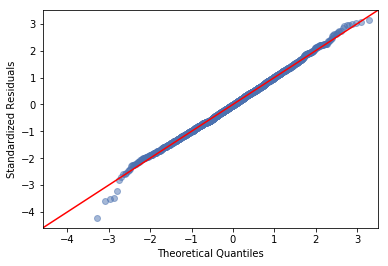

In [60]:
fit_y = model_fit.fittedvalues
res = model_fit.resid
norm_res = model_fit.get_influence().resid_studentized_internal
norm_resid_abssqrt = np.sqrt(np.abs(norm_res))
abs_resid = np.abs(res)

QQ = ProbPlot(norm_res)
plt_lm = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt_lm.axes[0].set_xlabel('Theoretical Quantiles')
plt_lm.axes[0].set_ylabel('Standardized Residuals')

As observed from the above graph, it is much better than the one observed for original one and is almost a linear fit.<br><br>Therefore, it can be very well said that log transformation is a better technique for reshaping than the original one for this give data.

##### Thus, we will now compare the rest of the transformation techniques with the log transformation model.

### 9.5 Power 1/10 for price

Pow 1/10 transformation means rescaling the attribute to its 1/10th power.We will use pow function to rescale the price attribute. <br><br>

We first take the power 1/10 of the price attribute and store it to a different attribute price_pow and use that attribute for observing the statistics to prove if it is a better model or not.
<br><br>
Below we have also plotted histogram for the rescaled price attribute to see if it is normally distrubuted or not.

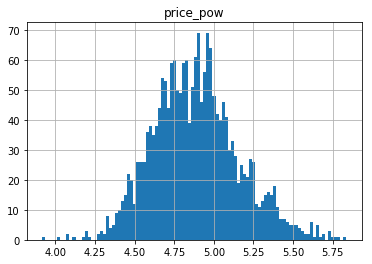

0.23941867413414464
0.3182963963868535


In [61]:
df_final["price_pow"] = [pow(float(x),1/10) for x in df_final['price']]
df_final.hist(column= "price_pow", bins = 100)
plt.show()
print(kurtosis(df_final["price_pow"]))
print(skew(df_final["price_pow"]))

As observed above, the graph is close to normally distributed and looks similar to the  model with log transformation of the attribute. <br><br>

Now we try to fit it to the linear model to see it the prediction is better than original or not.

In [62]:
import statsmodels.formula.api as smf
model_f = 'price_pow ~ bedrooms + \
                 bathrooms + \
                 parking_space + property_type'
model = smf.ols(formula=model_f, data=df_final)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_pow   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     44.15
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           1.32e-27
Time:                        22:14:22   Log-Likelihood:                -161.53
No. Observations:                1974   AIC:                             331.1
Df Residuals:                    1970   BIC:                             353.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.6386      0.026    181.483      0.000       4.588       4.689
bedrooms          0.0377      0.010      3.914      0.000       0.019       0.057
bathrooms         0.0664      0.012      5.651      0.000       0.043       0.089
parking_space     0.0163      0.008      2.031      0.042       0.001       0.032
==============================================================================
Omnibus:                       20.786   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.215
Skew:                           0.241   Prob(JB):                     2.47e-05
Kurtosis:                       3.159   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-sqaure value is 0.063 and also the kurtosis and skewness value is almost what it should be for normal distribution as mentioned above.<br><br>
Further the r-square, skewness are less and kurtosis is higher than the log model.<br><br>

###### Therefore, we will still take log model into consideration.

### 9.6 Square Root of the price

Square Root transformation means rescaling the attribute to its Square Root. We will use pow function to rescale the price attribute. <br><br>
We first take the square root of the price attribute and store it to a different attribute price_sqrt and use that attribute for observing the statistics to prove if it is a better model or not. <br><br>
Below we have also plotted histogram for the rescaled price attribute to see if it is normally distrubuted or not.

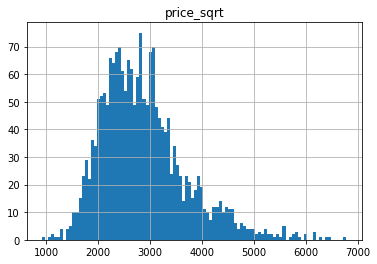

1.5598596099826496
1.0347495429946485


In [63]:
df_final["price_sqrt"] = [pow(float(x),0.5) for x in df_final['price']]
df_final.hist(column= "price_sqrt", bins = 100)
plt.show()
print(kurtosis(df_final["price_sqrt"]))
print(skew(df_final["price_sqrt"]))

As observed above, the graph is not normally distributed and looks right skewed.<br><br>
We will also try to fit it to the linear model to see it the prediction is better than original or not.

In [64]:
import statsmodels.formula.api as smf
model_f = 'price_sqrt ~ bedrooms + \
                 bathrooms + \
                 parking_space + property_type'
model = smf.ols(formula=model_f, data=df_final)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_sqrt   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     46.72
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           3.65e-29
Time:                        22:14:22   Log-Likelihood:                -15995.
No. Observations:                1974   AIC:                         3.200e+04
Df Residuals:                    1970   BIC:                         3.202e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2099.7399     77.804     26.988      0.000    1947.153    2252.327
bedrooms        116.7640     29.306      3.984      0.000      59.290     174.238
bathrooms       210.2214     35.766      5.878      0.000     140.079     280.364
parking_space    49.7944     24.411      2.040      0.042       1.920      97.669
==============================================================================
Omnibus:                      270.410   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.876
Skew:                           0.929   Prob(JB):                     3.70e-95
Kurtosis:                       4.354   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-sqaure value is 0.066 and also the kurtosis and skewness value is very high compared to the one for normal distribution as mentioned above.<br><br>
Further the r-square, skewness are less and kurtosis is higher than the log model.<br><br>
Therefore, we log model is better than all the transformations along with the original model

# 10. Summary

Based on the comparisons with all the transformations, we find that the log transformation is better.<br><br>Below is the residual fit comparison for the log and original transformation. It gives a much better picture about how log transformation is better than the original transformation and will work better.<br>
The skewness and kurtosis values are also that of normal distribution and hence data is is much more normally distrubuted than the original attributes

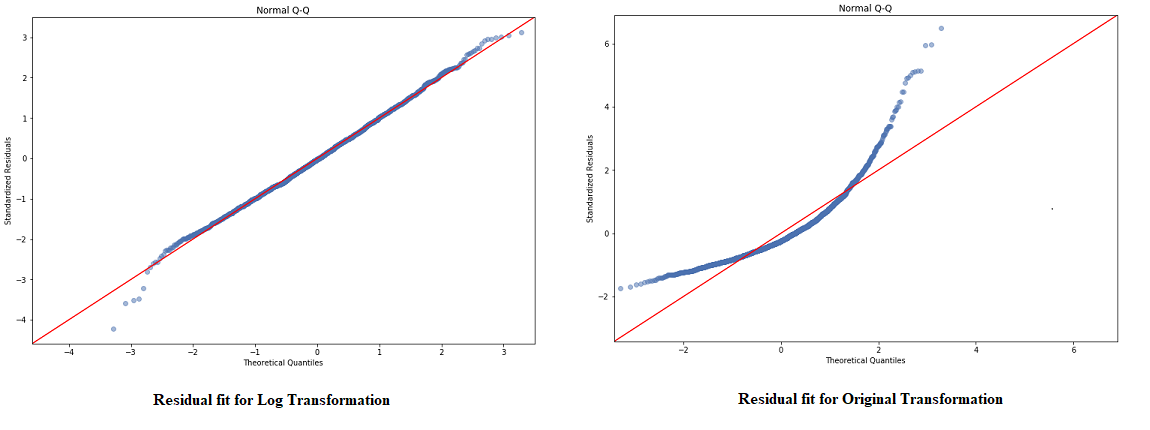

Additionally for each property, nearest shopping center, supermarket, hospital and train station that has a train to CBD is found and put in an output file.

# 11. References

* https://gist.github.com/mattmc3/712f280ec81044ec7bd12a6dda560787
* https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp
* https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
* https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm